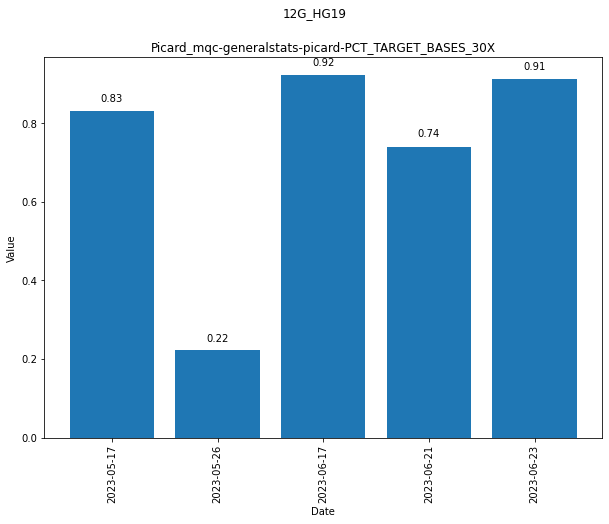

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
from typing import Union

def parsing_general_stats(average_value: str, file_multiqc_general_stats: str) -> Union[pd.DataFrame, np.float64]:
    data = pd.read_csv(file_multiqc_general_stats, sep='\s+')
    return data[['QualiMap_mqc-generalstats-qualimap-median_coverage', 
                 'QualiMap_mqc-generalstats-qualimap-mean_coverage', 
                 'Picard_mqc-generalstats-picard-PCT_TARGET_BASES_30X', 
                 'Picard_mqc-generalstats-picard-PERCENT_DUPLICATION']], data.mean()[average_value]


def cor_str(file: str, filename: str, root: str) -> datetime.date:
    if 'Seq' in root:
        part_of_root = root[root.find('Seq')+4:root.find('Seq')+10]
        correct_date = '20' + part_of_root
        date_obj = datetime.datetime.strptime(correct_date, '%Y%m%d').date()
    elif file == filename and 'Genolab' in root:
        part_of_root = root[root.find('Genolab')+8:root.find('Genolab')+16:]
        date_obj = datetime.datetime.strptime(part_of_root, '%Y%m%d').date()
    return date_obj
    
    
def plot_stats(stat_name: str, bed_file: str, df: pd.DataFrame, date_str: pd.Series) -> None:
    plt.figure(figsize=(10, 7))
    plt.bar(date_str, df['Value'])
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(stat_name)
    plt.suptitle(bed_file.split('.')[0])
    if 'coverage' in stat_name:
        for x, y in zip(date_str, df['Value']):
            y = int(y)
            plt.annotate(str(y) + 'x', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    elif 'PERCENT' in stat_name or 'TARGET_BASES' in stat_name:
        for x, y in zip(date_str, df['Value']):
            y = round(y,2)
            plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.show()

    
def find_files(stat_name: str, filename: str, bed_file: str, start_dir: str) -> pd.DataFrame:
    date = []
    value = []
    list_of_roots = []
    # Проходимся по всем файлам и папкам в указанной директории и выбираем с нужными bed. файлами
    for root, dirs, files in os.walk(start_dir):
        for file in files:
            if file == bed_file and 'MGI' not in root:
                file_path = os.path.join(root, 'results')
                list_of_roots.append(file_path)
    for i in list_of_roots:
        for root, dirs, files in os.walk(i):
            for file in files:
                if file == filename:
                # Достаём дату из названия запуска и переводим в объект времени
                    correct_date = cor_str(file, filename, root)
                    date.append(correct_date)
                    file_path = os.path.join(root, file)
                    multiqc_general_stats, stat_run_value = parsing_general_stats(stat_name, 
                                                                      file_multiqc_general_stats=file_path)
                    value.append(stat_run_value)
                
    # Строим гистограмму
    d = {'Date': date, 'Value': value}
    df = pd.DataFrame(data=d)
    df = df.sort_values(by=['Date'])
    # Переводим в str, чтобы даты были вместе
    date_str = df.iloc[:, 0].astype(str)
    plot_stats(stat_name, bed_file, df, date_str)            
    return df


if __name__ == "__main__":
    filename = 'multiqc_general_stats.txt'
    bed_file = '12G_HG19.bed'
    stat_name = 'Picard_mqc-generalstats-picard-PCT_TARGET_BASES_30X'
    start_dir='C:\\Users\\ДНС\\Python_Practive_2023_Tihomirov'
    find_files(stat_name, filename, bed_file, start_dir)
    

In [3]:
sample_sheet = open('SampleSheet.csv', 'r')
sample_sheet_info = sample_sheet.read()
s_s_i = sample_sheet_info.split('\n')
print(s_s_i)
print('-----------------------------------------------------------------------------------')

a = 0
for i in s_s_i:
    first = i.split(',')
    if first[0] == 'Sample_ID':
        index = a
    else:
        a += 1
print(index)
print('-----------------------------------------------------------------------------------')

s_s_i_index = s_s_i[index::]
print(s_s_i_index)
print('-----------------------------------------------------------------------------------')

file = '\n'.join(s_s_i_index)
print(file)

final_file = open('FinalSampleSheet.csv', 'w')
final_file.write(file)
final_file.close()
sample_sheet.close()

sample_sheet = pd.read_csv('FinalSampleSheet.csv', sep=',')
df = sample_sheet[['Sample_ID', 'Index_Plate_Well', 'I7_Index_ID', 'index', 'I5_Index_ID', 'index2']]
df

['[Header]', 'IEMFileVersion,5', 'Date,23.06.2023', 'Workflow,GenerateFASTQ', 'Application,NextSeq FASTQ Only', 'Instrument Type,NextSeq/MiniSeq', 'Assay,KAPA HyperPlus', '"Index Adapters,""KAPA UDI Adapters"""', 'Chemistry,Amplicon', '', '[Reads]', '151', '151', '', '[Settings]', 'Adapter,AGATCGGAAGAGCACACGTCTGAACTCCAGTCA', 'AdapterRead2,AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGT', '', '[Data]', 'Sample_ID,Sample_Name,Sample_Plate,Sample_Well,Index_Plate_Well,I7_Index_ID,index,I5_Index_ID,index2,Sample_Project,Description', 'KID16,,,,A01,i7_UDI01,GTAACATC,i5_UDI01,AATCGCTG,,', 'KID104,,,,A02,i7_UDI09,ATTATCAA,i5_UDI09,GAGAGTCG,,', 'MG2578,,,,A03,i7_UDI17,TGCTGCTG,i5_UDI17,ATGAGGAC,,', 'KID41,,,,B01,i7_UDI02,AGGTAAGG,i5_UDI02,GAATCGTG,,', 'KID106,,,,B02,i7_UDI10,CCAACATT,i5_UDI10,AAGAGAGC,,', 'MG2580,,,,B03,i7_UDI18,TATCTGCC,i5_UDI18,AGCGTTGG,,', 'KID88,,,,C01,i7_UDI03,ACAGGTAT,i5_UDI03,ATGGTGGC,,', 'KID110,,,,C02,i7_UDI11,GCCTAGCC,i5_UDI11,CAGACCAA,,', 'MG2623,,,,C03,i7_UDI19,ATTCCTCT,i5_UDI19

,Sample_ID,Index_Plate_Well,I7_Index_ID,index,I5_Index_ID,index2
0,KID16,A01,i7_UDI01,GTAACATC,i5_UDI01,AATCGCTG
1,KID104,A02,i7_UDI09,ATTATCAA,i5_UDI09,GAGAGTCG
2,MG2578,A03,i7_UDI17,TGCTGCTG,i5_UDI17,ATGAGGAC
3,KID41,B01,i7_UDI02,AGGTAAGG,i5_UDI02,GAATCGTG
4,KID106,B02,i7_UDI10,CCAACATT,i5_UDI10,AAGAGAGC
5,MG2580,B03,i7_UDI18,TATCTGCC,i5_UDI18,AGCGTTGG
6,KID88,C01,i7_UDI03,ACAGGTAT,i5_UDI03,ATGGTGGC
7,KID110,C02,i7_UDI11,GCCTAGCC,i5_UDI11,CAGACCAA
8,MG2623,C03,i7_UDI19,ATTCCTCT,i5_UDI19,AATATCGC
9,DS39239,D01,i7_UDI04,AATGTTCT,i5_UDI04,AGGTGACT
